# Import KBase and cFBA

In [1]:
# import kbase
import os
os.environ["HOME"] = 'C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\Internships\\Agronne\\cobrakbase'
import cobrakbase
token = 'TKWQA762H2SMAYRES3BFUP37LKGNGQSM'
kbase = cobrakbase.KBaseAPI(token)

ftp_path = '..\..\..\..\Biofilm growth code\GSWL code\ModelSEEDDatabase'

# import cFBA
%run ../ModelSEEDpy/modelseedpy/core/mscommunity.py
%matplotlib inline

cobrakbase 0.2.8


# The 2-member Zahmeeth model

## Unconstained model

### Define and execute the model


Production matrix:
                1          2           3
Donor                                   
1        0.000000  18.225811  352.783807
2      426.862309   0.000000  316.889436
3       37.298319  79.943201    0.000000


Consumption matrix:
                   1           2          3
Receiver                                   
1           0.000000  426.862309  37.298319
2          18.225811    0.000000  79.943201
3         352.783807  316.889436   0.000000


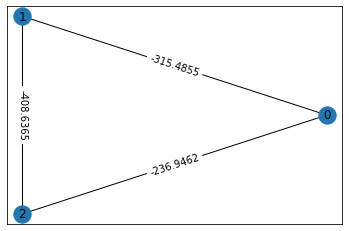

In [2]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["CMM_iAH991V2_iML1515.kb",40576]
mediaInfo_2 = ["Btheta_Ecoli_minimal_media",40576]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.constrain(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

In [ ]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["CMM_iAH991V2_iML1515.kb",40576]
mediaInfo_2 = ["Btheta_Ecoli_minimal_media",40576]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

# The 3-member model

## Unconstrained model

### Define and execute the model

In [ ]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.constrain(media) #, msdb_path_for_fullthermo = '..\..\..\Biofilm growth code\GSWL code\ModelSEEDDatabase')
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

In [ ]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## Aimee model

## Unconstrained model

### Define and execute the model

In [ ]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.constrain(media) #, msdb_path_for_fullthermo = '..\..\..\Biofilm growth code\GSWL code\ModelSEEDDatabase')
cfba.gapfill(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()

## FullThermo-constrained model

### Define and execute the model

In [ ]:
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.constrain(media, msdb_path_for_fullthermo = ftp_path)
cfba.gapfill(media)
solution = cfba.run()
cfba.compute_interactions(solution)
cfba.visualize()